In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Read csv file
diamonds_data = pd.read_csv('/content/drive/MyDrive/deep_learning/project/feed_forward_nn/Diamonds/diamonds.csv')

In [ ]:
# Visualize first 5 rows of the dataframe
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check for null values
diamonds_data.isna().sum()
# Found 1 column with null values

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Drop any irrelevant features
diamonds_data_2 = diamonds_data.drop(columns=['Unnamed: 0'])

In [ ]:
# Split features and labels dataset
diamonds_features = diamonds_data_2.drop(columns=['price'])
diamonds_labels = diamonds_data_2['price']

In [ ]:
# Perform numerical encoding for features because its rank based
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']
color_categories = ['J','I','H','G','F','E','D']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
ordinal_encoder = OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])
diamonds_features[['cut','color','clarity']] = ordinal_encoder.fit_transform(diamonds_features[['cut','color','clarity']])

In [ ]:
# Check the data after performed numerical encoding
diamonds_features.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,4.34,4.35,2.75


In [ ]:
# Convert python list into numpy array for better performance
# Split the dateset into train-validation-test sets using 60:20:20 split
SEED = 12345

diamonds_features_np= np.array(diamonds_features)
diamonds_labels_np = np.array(diamonds_labels)

x_train, x_iter, y_train, y_iter = train_test_split(diamonds_features_np,diamonds_labels_np,test_size=0.6,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_iter,y_iter,test_size=0.5,random_state=SEED)

In [ ]:
# Standardlize the data
standardizer = StandardScaler()
standardizer.fit(x_train)
x_train = standardizer.transform(x_train)
x_val = standardizer.transform(x_val)
x_test = standardizer.transform(x_test)

Model: "diamonds_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


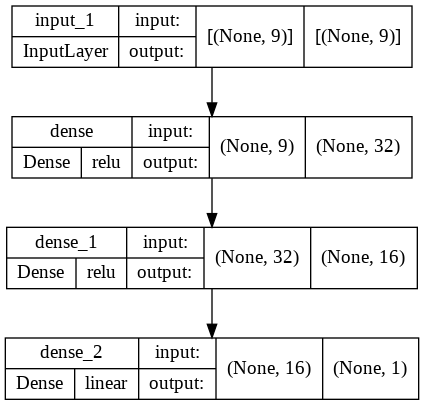

In [ ]:
# Model creation using Functional API
inputs = tf.keras.Input(shape=(x_train.shape[-1],))
dense = tf.keras.layers.Dense(32,activation='relu')
x = dense(inputs)
dense = tf.keras.layers.Dense(16,activation='relu')
x = dense(x)
outputs = tf.keras.layers.Dense(1,activation='linear')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs,name='diamonds_model')
model.summary()
keras.utils.plot_model(model,to_file='diamondsmodel.png',show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [ ]:
#Compile and train the model
EPOCHS=20
BATCH_SIZE=8
model.compile(optimizer='adam',loss='mse', metrics=['mse','mae'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/20
2697/2697 [==============================] - 7s 2ms/step - loss: 11163349.0000 - mse: 11163349.0000 - mae: 1969.5063 - val_loss: 1910749.2500 - val_mse: 1910749.2500 - val_mae: 803.5353
Epoch 2/20
2697/2697 [==============================] - 6s 2ms/step - loss: 1352349.6250 - mse: 1352349.6250 - mae: 708.3173 - val_loss: 1441761.6250 - val_mse: 1441761.6250 - val_mae: 665.8318
Epoch 3/20
2697/2697 [==============================] - 7s 2ms/step - loss: 1183745.7500 - mse: 1183745.7500 - mae: 654.4617 - val_loss: 1408417.5000 - val_mse: 1408417.5000 - val_mae: 638.0185
Epoch 4/20
2697/2697 [==============================] - 6s 2ms/step - loss: 1121343.0000 - mse: 1121343.0000 - mae: 628.9587 - val_loss: 1384637.3750 - val_mse: 1384637.3750 - val_mae: 621.2733
Epoch 5/20
2697/2697 [==============================] - 6s 2ms/step - loss: 1073110.5000 - mse: 1073110.5000 - mae: 616.2025 - val_loss: 1372227.2500 - val_mse: 1372227.2500 - val_mae: 611.2477
Epoch 6/20
2697/2697 [=====

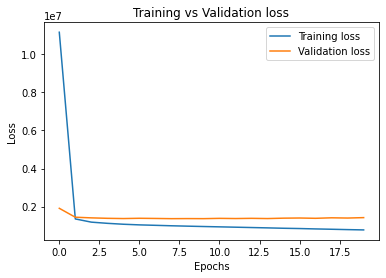

In [ ]:
# Plot the training vs validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = history.epoch
plt.plot(epochs, loss_train, label='Training loss')
plt.plot(epochs, loss_val, label='Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

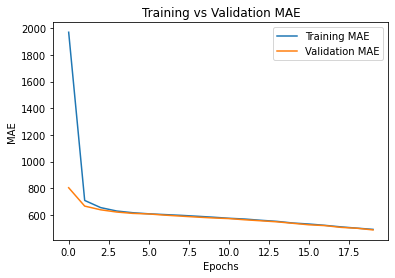

In [ ]:
# Plot the training vs validation MAE
training_mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = history.epoch
plt.plot(epochs, training_mae, label='Training MAE')
plt.plot(epochs, validation_mae, label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# Evaluate with test data for wild testing
test_result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print('------------------------Test Result----------------------------')
print(f"Test loss = {test_result[0]}")
print(f"Test MAE = {test_result[1]}")
print(f"Test MSE = {test_result[2]}")

2023/2023 [==============================] - 4s 2ms/step - loss: 951719.1250 - mse: 951719.1250 - mae: 489.7984
------------------------Test Result----------------------------
Test loss = 951719.125
Test MAE = 951719.125
Test MSE = 489.79840087890625
